In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X=dataset.iloc[:,[3,4]].values

In [5]:
from sklearn.cluster import AffinityPropagation
affp = AffinityPropagation()
label=affp.fit_predict(X)

In [6]:
cluster_centers_indices = affp.cluster_centers_indices_
labels = affp.labels_

In [7]:
n_clusters = len(cluster_centers_indices)
print("Number of estimated clusters:", n_clusters)

Number of estimated clusters: 11


Text(0, 0.5, 'Spending Score')

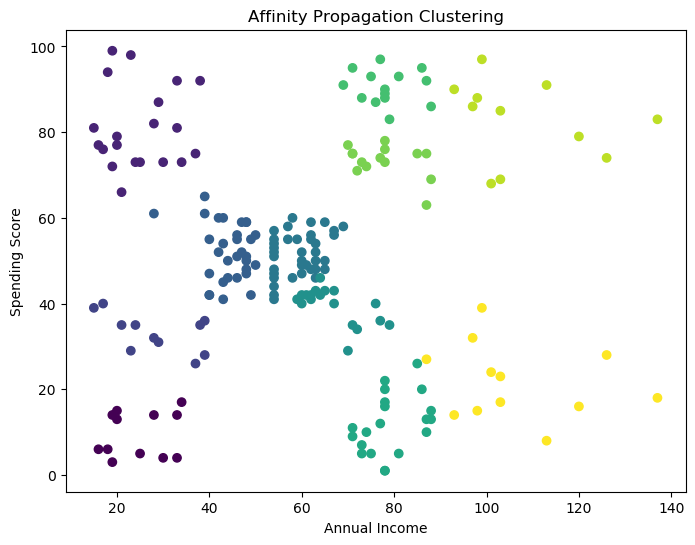

In [19]:
#Plot the clusters
#Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Affinity Propagation Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

In [15]:
#Plot the cluster centers
centroids=affp.cluster_centers_

In [16]:
centroids

array([[ 25,   5],
       [ 28,  82],
       [ 28,  32],
       [ 46,  51],
       [ 60,  52],
       [ 67,  40],
       [ 77,  12],
       [ 78,  90],
       [ 78,  73],
       [103,  85],
       [103,  23]], dtype=int64)

In [9]:
supervised=pd.DataFrame(dataset)

In [10]:
supervised["cluster_group"]=labels

In [13]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,9
196,197,Female,45,126,28,10
197,198,Male,32,126,74,9
198,199,Male,32,137,18,10


In [14]:
supervised.to_csv("clusters.csv",index=False)

In [17]:
dir(affp)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_pairwise',
 'affinity',
 'affinity_matrix_',
 'cluster_centers_',
 'cluster_centers_indices_',
 'convergence_iter',
 'copy',
 'damping',
 'fit',
 'fit_predict',
 'get_params',
 'labels_',
 'max_iter',
 'n_iter_',
 'predict',
 'preference',
 'set_params',
 'verbose']

C:\Users\abina\Anac\envs\aiml\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


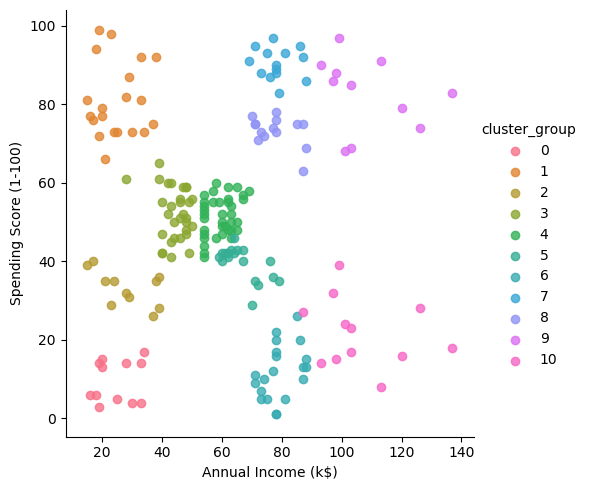

In [20]:
import seaborn as sns #seaborn is a library for graphical purpose
facet=sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], 
                 hue=supervised.columns[5],fit_reg=False, legend=True, legend_out=True)

In [ ]:
#another way to plot cluster center
#for cluster_center_index in cluster_centers_indices:
    #cluster_center = X[cluster_center_index]
    #plt.scatter(cluster_center[0], cluster_center[1], marker='x', color='red', s=200, linewidths=5)

#plt.show()